In [1]:
import pandas as pd
import numpy as np
import glob
import gc
import matplotlib.pyplot as plt
from matplotlib import colors
from astropy.coordinates import SkyCoord, AltAz, angular_separation
import astropy.units as u
from scipy.stats import binned_statistic
from scipy.signal import lombscargle
from datetime import datetime
import seaborn as sns
import scipy as sc
max_diffuse_nsb_std = 2.3
test_file = '/Users/vdk/muons2024/v0.9-v0.10/20240228/DL1_datacheck_20240228.h5'
with pd.HDFStore(test_file) as hdf:
    # This prints a list of all group names:
    print(hdf.keys())
    # print(hdf['cosmics'])
    # if '/cosmics_intensity_spectrum' in hdf.keys():
    #     print('hi')
        
import h5py 
start_date_2019 = datetime.strptime("2019-01-01 00:00:00.0", "%Y-%m-%d %H:%M:%S.%f").timestamp()
end_date_2019 = datetime.strptime("2019-12-31 00:00:00.0", "%Y-%m-%d %H:%M:%S.%f").timestamp()
    
start_date_2020 = datetime.strptime("2020-01-01 00:00:00.0", "%Y-%m-%d %H:%M:%S.%f").timestamp()
end_date_2020 = datetime.strptime("2020-12-31 00:00:00.0", "%Y-%m-%d %H:%M:%S.%f").timestamp()

start_date_2021 = datetime.strptime("2021-01-01 00:00:00.0", "%Y-%m-%d %H:%M:%S.%f").timestamp()
end_date_2021 = datetime.strptime("2021-12-31 00:00:00.0", "%Y-%m-%d %H:%M:%S.%f").timestamp()

start_date_2022 = datetime.strptime("2022-01-01 00:00:00.0", "%Y-%m-%d %H:%M:%S.%f").timestamp()
end_date_2022 = datetime.strptime("2022-12-31 00:00:00.0", "%Y-%m-%d %H:%M:%S.%f").timestamp()

start_date_2023 = datetime.strptime("2023-01-01 00:00:00.0", "%Y-%m-%d %H:%M:%S.%f").timestamp()
end_date_2023 = datetime.strptime("2023-12-31 00:00:00.0", "%Y-%m-%d %H:%M:%S.%f").timestamp()

start_date_2024 = datetime.strptime("2024-01-01 00:00:00.0", "%Y-%m-%d %H:%M:%S.%f").timestamp()
end_date_2024 = datetime.strptime("2024-12-31 00:00:00.0", "%Y-%m-%d %H:%M:%S.%f").timestamp()

['/cosmics', '/cosmics_intensity_spectrum', '/flatfield', '/pedestals', '/runsummary']


### Datachek only for 2024 year

In [2]:
files = glob.glob('/Users/vdk/muons2024/datachecks/2024_datachecks/DL1_datacheck_*.h5')
files.sort()

runsummary = []
cosmics = []
cis = []
for file in files:
    try:
        runsummary.append(pd.read_hdf(file, 'runsummary'))
        cosmics.append(pd.read_hdf(file, 'cosmics'))
        cis.append(pd.read_hdf(file, 'cosmics_intensity_spectrum'))
    except:
        print(file)
    
cosmics_pd = pd.concat(cosmics, ignore_index=True)
runsummary_pd = pd.concat(runsummary, ignore_index=True)
cis_pd = pd.concat(cis, ignore_index=True)
cosmics_pd.columns

Index(['runnumber', 'subrun', 'time', 'elapsed_time', 'events', 'azimuth',
       'altitude', 'wrong_ucts_trig_type', 'wrong_tib_trig_type',
       'unknown_ucts_trig_type', 'unknown_tib_trig_type', 'num_ucts_jumps',
       'num_contained_mu_rings', 'mu_effi_mean', 'mu_effi_stddev',
       'mu_width_mean', 'mu_width_stddev', 'mu_radius_mean',
       'mu_radius_stddev', 'mu_intensity_mean', 'mu_hg_peak_sample',
       'mu_hg_peak_sample_stddev', 'fraction_pulses_above10',
       'fraction_pulses_above30'],
      dtype='object')

#### Time of observations

Text(0, 0.5, 'Normalized counts')

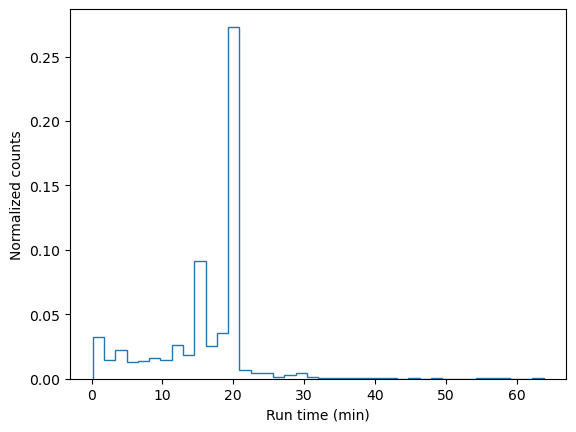

In [6]:
z,x,c = plt.hist((runsummary_pd['elapsed_time']/60), bins = 40, histtype='step', density = True)
plt.xlabel('Run time (min)')
plt.ylabel('Normalized counts')

In [8]:
low_nsb_runs_2024 = cis_pd[['yyyymmdd','runnumber', 'subrun']][(cis_pd['diffuse_nsb_std'] < max_diffuse_nsb_std)]
low_nsb_runs_2024_full = cis_pd[(cis_pd['diffuse_nsb_std'] < max_diffuse_nsb_std)]
low_nsb_runsummary_2024  = runsummary_pd[runsummary_pd['runnumber'].isin(low_nsb_runs_2024['runnumber'])]
low_nsb_runs_time = low_nsb_runsummary_2024[['runnumber', 'elapsed_time']]

,yyyymmdd,ra_tel,dec_tel,cos_zenith,az_tel,runnumber,subrun,time,elapsed_time,corrected_elapsed_time,...,ZD_corrected_delta_cosmics_rate_at_422_pe,cosmics_spectral_index,delta_cosmics_spectral_index,ZD_corrected_cosmics_spectral_index,intensity_spectrum_fit_p_value,intensity_at_reference_rate,light_yield,diffuse_nsb_std,num_star_affected_pixels,anomalous_low_intensity_peak
0,20240109,38.627020,20.287378,0.989353,3.155814,16273,0,1.704832e+09,6.790493,6.790493,...,0.014051,-2.247435,0.052820,-2.244051,0.898373,407.803699,0.940141,1.822585,68,False
1,20240109,38.627012,20.285625,0.989347,3.159036,16273,1,1.704832e+09,6.878649,6.878649,...,0.022918,-2.233010,0.087544,-2.229624,0.656611,405.649634,0.930855,1.842149,68,False
2,20240109,38.626897,20.286913,0.989349,3.162362,16273,2,1.704832e+09,7.278938,7.278938,...,0.036727,-2.348206,0.134110,-2.344821,0.243174,414.198415,0.967988,1.805227,68,False
3,20240109,38.627051,20.289238,0.989353,3.165844,16273,3,1.704832e+09,7.495558,7.495558,...,0.017369,-2.210842,0.063447,-2.207459,0.808749,413.187123,0.962151,1.790048,69,False
4,20240109,38.627116,20.293093,0.989361,3.169367,16273,4,1.704832e+09,7.484118,7.484118,...,0.037224,-2.249590,0.138484,-2.246209,0.213512,411.248418,0.954548,1.788340,69,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137136,20240709,307.796638,40.644570,0.861187,-1.007142,18185,84,1.720587e+09,9.160903,9.160903,...,0.027867,-2.243075,0.106112,-2.192909,0.405068,407.320753,0.936989,1.765578,117,False
137137,20240709,307.786047,40.644527,0.860868,-1.007408,18185,85,1.720587e+09,9.065719,9.065719,...,0.043132,-2.343005,0.159258,-2.292709,0.079317,410.924039,0.953924,1.764464,114,False
137138,20240709,307.787144,40.644459,0.860625,-1.007611,18185,86,1.720587e+09,9.153535,9.153535,...,0.028314,-2.257548,0.105003,-2.207153,0.397221,410.044923,0.948811,1.764181,115,False
137139,20240709,307.787119,40.644501,0.860373,-1.007816,18185,87,1.720587e+09,9.195149,9.195149,...,0.027809,-2.399535,0.106293,-2.349037,0.407403,407.948818,0.942739,1.767225,114,False


In [24]:
low_nsb_runs_time.to_csv('/Users/vdk/Software/code/muon_paper_2024/2024_low_nsb_runnumbers.csv')  # header=True to include the index name if it has one

### Datacheck for 2021-2023

In [25]:
files = glob.glob('/Users/vdk/muons2024/v0.9-v0.10/20*/DL1_datacheck_*.h5')
files.sort()

runsummary = []
cosmics = []
cis = []
for file in files:
    try:
        runsummary.append(pd.read_hdf(file, 'runsummary'))
        cosmics.append(pd.read_hdf(file, 'cosmics'))
        cis.append(pd.read_hdf(file, 'cosmics_intensity_spectrum'))
    except:
        print(file)
    
cosmics_pd = pd.concat(cosmics, ignore_index=True)
runsummary_pd = pd.concat(runsummary, ignore_index=True)
cis_pd = pd.concat(cis, ignore_index=True)
cosmics_pd.columns

/Users/vdk/muons2024/v0.9-v0.10/20221219/DL1_datacheck_20221217.h5
/Users/vdk/muons2024/v0.9-v0.10/20221219/DL1_datacheck_20221218.h5
/Users/vdk/muons2024/v0.9-v0.10/20221219/DL1_datacheck_20221219.h5


Index(['runnumber', 'subrun', 'time', 'elapsed_time', 'events', 'azimuth',
       'altitude', 'wrong_ucts_trig_type', 'wrong_tib_trig_type',
       'unknown_ucts_trig_type', 'unknown_tib_trig_type', 'num_ucts_jumps',
       'num_contained_mu_rings', 'mu_effi_mean', 'mu_effi_stddev',
       'mu_width_mean', 'mu_width_stddev', 'mu_radius_mean',
       'mu_radius_stddev', 'mu_intensity_mean', 'mu_hg_peak_sample',
       'mu_hg_peak_sample_stddev', 'fraction_pulses_above10',
       'fraction_pulses_above30'],
      dtype='object')

In [26]:
low_nsb_runs = cis_pd[['yyyymmdd','runnumber', 'subrun']][(cis_pd['diffuse_nsb_std'] < max_diffuse_nsb_std)]
low_nsb_runsummary = runsummary_pd[runsummary_pd['runnumber'].isin(low_nsb_runs['runnumber'])]
low_nsb_cosmics = cosmics_pd[cosmics_pd['runnumber'].isin(low_nsb_runs['runnumber'])]
low_nsb_cosmics

,runnumber,subrun,time,elapsed_time,events,azimuth,altitude,wrong_ucts_trig_type,wrong_tib_trig_type,unknown_ucts_trig_type,...,mu_effi_stddev,mu_width_mean,mu_width_stddev,mu_radius_mean,mu_radius_stddev,mu_intensity_mean,mu_hg_peak_sample,mu_hg_peak_sample_stddev,fraction_pulses_above10,fraction_pulses_above30
0,1615,0,1.574552e+09,24.100643,50637,4.604371,1.071770,0.0,10.0,50637,...,0.010725,0.062351,0.017688,1.070335,0.099711,2313.711426,12.662162,1.037344,0.010618,0.002622
1,1615,1,1.574552e+09,24.087356,50634,4.607692,1.067383,0.0,8.0,50634,...,0.013619,0.066789,0.017587,1.046328,0.108055,2315.158691,13.393939,1.507711,0.010700,0.002738
2,1615,2,1.574552e+09,24.476276,50605,4.608190,1.066719,0.0,10.0,50605,...,0.015461,0.064313,0.020475,1.083877,0.105996,2343.243164,12.847222,1.285452,0.010981,0.002713
3,1615,3,1.574553e+09,24.035344,50645,4.609890,1.064421,0.0,10.0,50645,...,0.013594,0.064370,0.026010,1.050182,0.115174,2297.864502,13.094595,1.346420,0.010611,0.002712
4,1615,4,1.574553e+09,25.515290,50630,4.610365,1.063804,0.0,9.0,50630,...,0.013783,0.062570,0.015944,1.088282,0.101900,2372.299072,12.847222,1.589222,0.010605,0.002699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
790755,16897,4,1.709166e+09,119.236720,36080,1.248052,0.800884,0.0,0.0,0,...,0.009036,0.126604,0.015442,1.146832,0.102177,1323.607422,11.375000,1.500000,0.030590,0.004015
790756,16897,5,1.709166e+09,150.845175,29721,1.249751,0.808214,0.0,0.0,0,...,0.011334,0.122119,0.021165,1.087885,0.053706,1298.256470,10.666667,1.775251,0.037174,0.004128
790757,16897,6,1.709167e+09,176.522166,24594,1.252201,0.818946,0.0,0.0,0,...,NaN,0.111994,NaN,1.200372,NaN,1388.520020,4.000000,NaN,0.042609,0.005328
790758,16897,7,1.709167e+09,177.568846,24384,1.254610,0.829748,0.0,0.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.025073,0.005885


In [34]:
runs2019 = low_nsb_runsummary[['runnumber', 'elapsed_time']][(low_nsb_runsummary['time'] > start_date_2019) &
                                           (low_nsb_runsummary['time'] < end_date_2019)]
runs2020 = low_nsb_runsummary[['runnumber', 'elapsed_time']][(low_nsb_runsummary['time'] > start_date_2020) &
                                           (low_nsb_runsummary['time'] < end_date_2020)]
runs2021 = low_nsb_runsummary[['runnumber', 'elapsed_time']][(low_nsb_runsummary['time'] > start_date_2021) &
                                           (low_nsb_runsummary['time'] < end_date_2021)]
runs2022 = low_nsb_runsummary[['runnumber', 'elapsed_time']][(low_nsb_runsummary['time'] > start_date_2022) &
                                           (low_nsb_runsummary['time'] < end_date_2022)]
runs2023 = low_nsb_runsummary[['runnumber', 'elapsed_time']][(low_nsb_runsummary['time'] > start_date_2023) &
                                           (low_nsb_runsummary['time'] < end_date_2023)]

In [40]:
# runs2019.to_csv('/Users/vdk/Software/code/muon_paper_2024/2019_low_nsb_runnumbers.csv') 
# runs2020.to_csv('/Users/vdk/Software/code/muon_paper_2024/2020_low_nsb_runnumbers.csv')
# runs2021.to_csv('/Users/vdk/Software/code/muon_paper_2024/2021_low_nsb_runnumbers.csv')
# runs2022.to_csv('/Users/vdk/Software/code/muon_paper_2024/2022_low_nsb_runnumbers.csv')
# runs2023.to_csv('/Users/vdk/Software/code/muon_paper_2024/2023_low_nsb_runnumbers.csv')


In [55]:
df = pd.read_csv('/Users/vdk/muons2024/pandas_data_frames/2021_low_nsb_runnumbers.csv', index_col=False)
df = df.drop(columns=["Unnamed: 0"])

(array([1.265e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([4.68043677e-01, 5.71924798e+01, 1.13916916e+02, 1.70641352e+02,
        2.27365788e+02, 2.84090224e+02, 3.40814661e+02, 3.97539097e+02,
        4.54263533e+02, 5.10987969e+02, 5.67712405e+02]),
 <BarContainer object of 10 artists>)

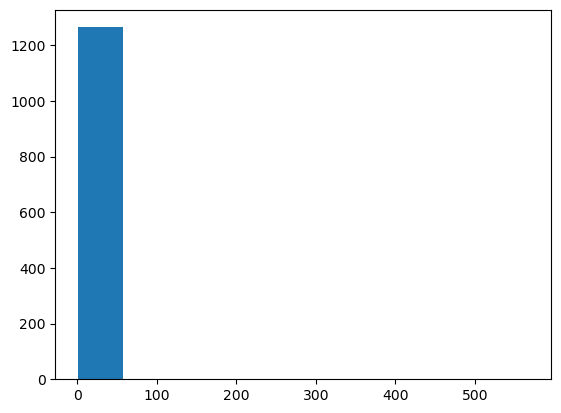

In [56]:
plt.hist(df['elapsed_time']/60)

In [61]:
run_numbers = np.array(df['runnumber']).flatten()
tim_elapsed = np.array(df['elapsed_time']).flatten()
run_numbers

array([3514, 3515, 3516, ..., 6315, 6323, 6324])

In [68]:
runs2022

,runnumber,elapsed_time
1887,6851,830.393977
1888,6852,410.262447
1889,6853,159.385594
1890,6854,1064.754764
1891,6855,1506.233128
...,...,...
4455,11600,1006.839859
4456,11603,1056.061666
4457,11604,1182.628568
4458,11605,1188.198910


In [69]:
len('6851')

4